In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
import IPython.display

import librosa
import librosa.display

In [41]:
audio_path1 = '/Users/katielazell-fairman/desktop/projects/jazz_music/music_downloads/0817-Balboa.mp3'
audio_path2 = '/Users/katielazell-fairman/desktop/projects/jazz_music/music_downloads/0947-Blues.mp3'
audio_path3 = '/Users/katielazell-fairman/documents/music/Si Tu Vois Ma Mère - Midnight in Paris (2011)-bmVTnLR02Nc.mp3'
y, sr = librosa.load(audio_path3)

In [43]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

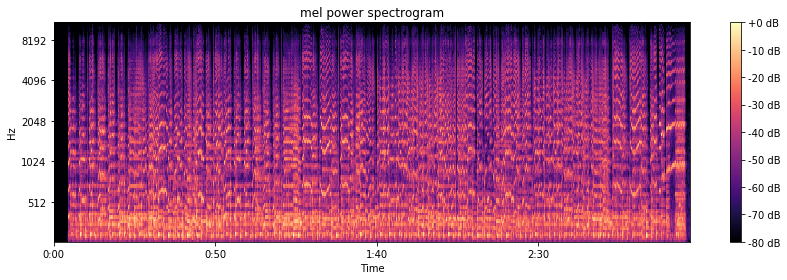

In [44]:
# Plot of Si Tu Vois Ma Mère - Midnight in Paris (2011)
plt.show()

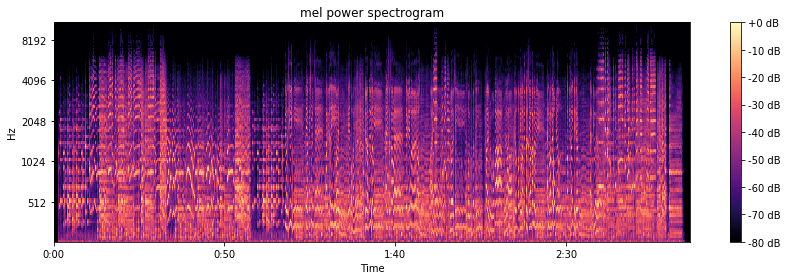

In [18]:
#Plt of 0947-Blues.mp3
plt.show()

In [47]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.3)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


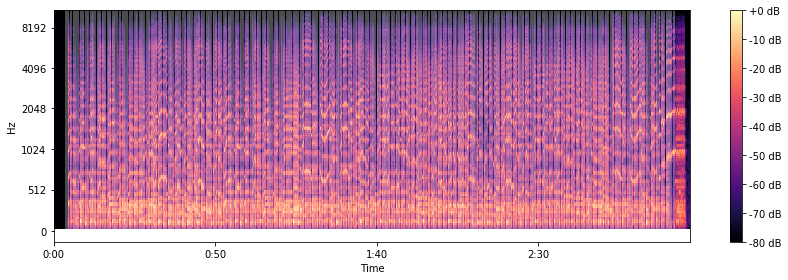

In [48]:
# Plot of Si Tu Vois Ma Mère - Midnight in Paris (2011)
plt.show()

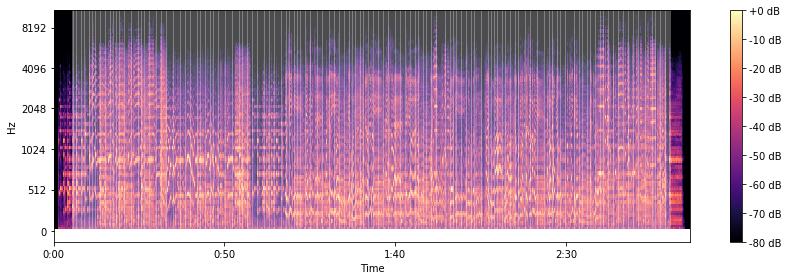

In [26]:
#Plt of 0947-Blues.mp3
plt.show()

In [14]:
#0817-Balboa.mp3 - BPM online = 139

print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

Estimated tempo:        143.55 BPM
('First 5 beat frames:   ', array([ 2, 20, 39, 58, 77]))
('First 5 beat times:    ', array([ 0.04643991,  0.46439909,  0.90557823,  1.34675737,  1.78793651]))


In [24]:
#0947-Blues.mp3 - BPM online = 77

print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

Estimated tempo:        123.05 BPM
('First 5 beat frames:   ', array([240, 261, 281, 301, 321]))
('First 5 beat times:    ', array([ 5.57278912,  6.06040816,  6.52480726,  6.98920635,  7.45360544]))


In [49]:
#Plot of Si Tu Vois Ma Mère - Midnight in Paris (2011) - BPM online = 77

print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

Estimated tempo:        80.75 BPM
('First 5 beat frames:   ', array([164, 196, 234, 267, 299]))
('First 5 beat times:    ', array([ 3.80807256,  4.55111111,  5.43346939,  6.19972789,  6.94276644]))


In [27]:
import pandas as pd
import numpy as np
import random
import pause


def clean_info(df):
    pd.set_option('display.max_colwidth', -1) 
    df['Year'] = df['Info'].str[8:12]
    df = df[df['Year'].str.contains("19")]
    df['Year'] = df['Year'].astype(int)
    df = df[(df['Year'] >= 1926) & (df['Year'] < 1960)]
    
    df['Artist Info'] = df['Info'].str[13:]
    df['MP3 Avaliable'] = 'Online'
    # Find multi-links:
    df['comma_loc'] = df['Download_link'].str.find(",")
    df['Link'] = np.where(df['comma_loc'] == -1, df['Download_link'], df['Download_link'].str[:47])
    df['Artist'] = df['Artist'].str.strip()
    
    return df[['Artist', 'Title', 'Year', 'MP3 Avaliable', 'Link']]
    

In [40]:
data = pd.read_csv('jazz_on_line/jazz_on_line/data/results_000052.csv')
output = clean_info(data)
#filename = str(input("filename"))
print len(output)
output[60:]

76


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Artist,Title,Year,MP3 Avaliable,Link
70,Bing Crosby acc by Jack Teagarden And His Orchestra,The Birth Of The Blues,1941,Online,http://www.jazz-on-line.com/a/mp3o/DECDLA2412.mp3
71,Charlie Ventura Sextet,C.V. Jump,1945,Online,http://www.jazz-on-line.com/a/2014/CL497726.mp3
73,Boots And His Buddies,Marie,1936,Online,http://www.jazz-on-line.com/a/mp3b/BLU99359.mp3
74,Isham Jones Orchestra,Not A Cloud In The Sky,1930,Online,http://www.jazz-on-line.com/a/mp3a/BRUC5742.mp3
75,Carroll Gibbons And The Savoy Hotel Orpheans,Can't Get Out Of This Mood (V Edna Kaye),1943,Online,http://www.jazz-on-line.com/a/mp3b/Joh126.mp3
76,Ella Fitzgerald,From This Moment On,1956,Online,http://www.jazz-on-line.com/a/mp3t/TS481079.mp3
77,Teddy Wilson Quartet,Honeysuckle Rose,1937,Online,http://www.jazz-on-line.com/a/mp3b/BRULA1431-A.mp3
78,Chris Connor,Soon,1957,Online,http://www.jazz-on-line.com/a/mp3t/TS486797.mp3
79,Jimmie Lunceford And His Orchestra,Rainin',1938,Online,http://www.jazz-on-line.com/a/mp3d/Oke23904-1.mp3
80,Anson Weeks Orchestra And Donald Novis,Meet Me In The Gloaming,1933,Online,http://www.jazz-on-line.com/a/2b17/BB508725.mp3
